## Cleaning of the base
The data set HMEQ reports characteristics and delinquency information for 5,960 home equity loans. A home equity loan is a loan where the obligor uses the equity of his or her home as the underlying collateral. The data set has the following characteristics:
- BAD: 1 = applicant defaulted on loan or seriously delinquent; 0 = applicant paid loan
- LOAN: Amount of the loan request
- MORTDUE: Amount due on existing mortgage
- VALUE: Value of current property
- REASON: DebtCon = debt consolidation; HomeImp = home improvement
- JOB: Occupational categories
- YOJ: Years at present job
- DEROG: Number of major derogatory reports
- DELINQ: Number of delinquent credit lines
- CLAGE: Age of oldest credit line in months
- NINQ: Number of recent credit inquiries
- CLNO: Number of credit lines
- DEBTINC: Debt-to-income ratio

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
df = pd.read_csv('hmeq.csv')

In [3]:
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [4]:
df['REASON'].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

In [5]:
df = pd.get_dummies(df, columns=['REASON'])

In [6]:
df['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [7]:
df = pd.get_dummies(df, columns=['JOB'])
df.shape

(5960, 19)

In [8]:
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,0,1,0,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,0,1,0,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,0,1,0,0,1,0,0,0
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,0,1,0,1,0,0,0,0
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0
6,1,1800,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,NaN,0,1,0,0,1,0,0,0
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1,0,0,1,0,0,0
8,1,2000,32700.0,46740.0,3.0,0.0,2.0,216.933333,1.0,12.0,NaN,0,1,0,0,1,0,0,0
9,1,2000,NaN,62250.0,16.0,0.0,0.0,115.800000,0.0,13.0,NaN,0,1,0,0,0,0,1,0


In [9]:
df.isnull().sum()

BAD                  0
LOAN                 0
MORTDUE            518
VALUE              112
YOJ                515
DEROG              708
DELINQ             580
CLAGE              308
NINQ               510
CLNO               222
DEBTINC           1267
REASON_DebtCon       0
REASON_HomeImp       0
JOB_Mgr              0
JOB_Office           0
JOB_Other            0
JOB_ProfExe          0
JOB_Sales            0
JOB_Self             0
dtype: int64

In [10]:
df[df.columns.difference(['MORTDUE', 'VALUE'])] = df[df.columns.difference(['MORTDUE', 'VALUE'])].fillna(df[df.columns.difference(['MORTDUE', 'VALUE'])].median())

In [11]:
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,0,1,0,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,0,1,0,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,0,1,0,0,1,0,0,0
3,1,1500,NaN,NaN,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,0,0,0,0,0,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,0,1,0,1,0,0,0,0
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0
6,1,1800,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,34.818262,0,1,0,0,1,0,0,0
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1,0,0,1,0,0,0
8,1,2000,32700.0,46740.0,3.0,0.0,2.0,216.933333,1.0,12.0,34.818262,0,1,0,0,1,0,0,0
9,1,2000,NaN,62250.0,16.0,0.0,0.0,115.800000,0.0,13.0,34.818262,0,1,0,0,0,0,1,0


In [12]:
df[df['MORTDUE'].isna() & df['VALUE'].isna()] = df[df['MORTDUE'].isna() & df['VALUE'].isna()].fillna(df[df['MORTDUE'].notna() & df['VALUE'].notna()].median())

In [13]:
df[df['MORTDUE'].notna() & df['VALUE'].isna()].head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
10,1,2000,22608.0,NaN,18.0,0.0,0.0,173.466667,1.0,20.0,34.818262,0,0,0,0,0,0,0,0
17,1,2200,23030.0,NaN,19.0,0.0,0.0,173.466667,1.0,20.0,3.711312,0,0,0,0,0,0,0,0
23,1,2400,18000.0,NaN,22.0,0.0,2.0,121.733333,0.0,10.0,34.818262,0,1,1,0,0,0,0,0
57,1,3200,23159.0,NaN,20.0,0.0,2.0,117.805748,0.0,9.0,0.524499,0,1,1,0,0,0,0,0
119,1,4500,57000.0,NaN,5.0,0.0,0.0,222.600000,1.0,13.0,34.818262,0,1,0,0,1,0,0,0


In [25]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df['VALUE'] = imputer.fit_transform(df[['VALUE']])
df['MORTDUE'] = imputer.fit_transform(df[['MORTDUE']])

In [14]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
count,5960.000000,5960.000000,5469.000000,5875.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18607.969799,73717.669446,101731.943156,8.756166,0.224329,0.405705,179.440725,1.170134,21.247819,34.000651,0.659060,0.298658,0.128691,0.159060,0.400671,0.214094,0.018289,0.032383
std,0.399656,11207.480417,44351.943039,57257.415871,7.259424,0.798458,1.079256,83.574697,1.653866,9.951308,7.644528,0.474065,0.457708,0.334886,0.365763,0.490076,0.410227,0.134004,0.177029
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11100.000000,46406.000000,66196.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,16300.000000,65021.000000,89515.000000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,23300.000000,91250.000000,119602.000000,12.000000,0.000000,0.000000,227.143058,2.000000,26.000000,37.949892,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
X = df.drop(columns=['BAD'])
y = df.BAD

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=342)

In [29]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=342).fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8243847874720358

In [31]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(penalty='l1',solver='liblinear', random_state=344).fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred2)

0.8456375838926175

In [33]:
from statsmodels.discrete.discrete_model import Probit
clf3 = Probit(y_train, X_train)
probit_model = clf3.fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.396815
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 4172
Model:                         Probit   Df Residuals:                     4154
Method:                           MLE   Df Model:                           17
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                  0.2156
Time:                        20:47:10   Log-Likelihood:                -1655.5
converged:                       True   LL-Null:                       -2110.5
Covariance Type:            nonrobust   LLR p-value:                1.593e-182
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
LOAN           -1.311e-05   2.62e-06     -4.997      0.000   -1.83e-05   -7.97e-06
MORTDUE        -4

In [34]:
y_pred3 = probit_model.predict(X_test)
y_pred3 = (y_pred3>0.5).astype(np.int)

In [35]:
accuracy_score(y_test, y_pred3)

0.8461968680089486

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1450
           1       0.68      0.35      0.46       338

    accuracy                           0.85      1788
   macro avg       0.77      0.66      0.69      1788
weighted avg       0.83      0.85      0.83      1788



In [37]:
from sklearn import linear_model
clf4 = linear_model.PoissonRegressor()
clf4.fit(X_train, y_train)
y_pred4 = clf4.predict(X_test)
y_pred4 = (y_pred4>0.5).astype(np.int)

E:\Conda\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
E:\Conda\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
E:\Conda\lib\site-packages\sklearn\linear_model\_glm\glm.py:43: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
E:\Conda\lib\site-packages\sklearn\_loss\glm_distribution.py:315: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y/y_pred) - y + y_pred)
E:\Conda\lib\site-packages\sklearn\_loss\glm_distribution.py:315: RuntimeWarning: invalid value encountered in true_divide
  dev = 2 * (xlogy(y, y/y_pred) - y + y_pred)
E:\Conda\lib\site-packages\sklearn\linear_model\_glm\glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=2):
A

In [38]:
accuracy_score(y_test, y_pred4)

0.8109619686800895

In [39]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, y_train)
y_pred5 = neigh.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred5)

0.8221476510067114

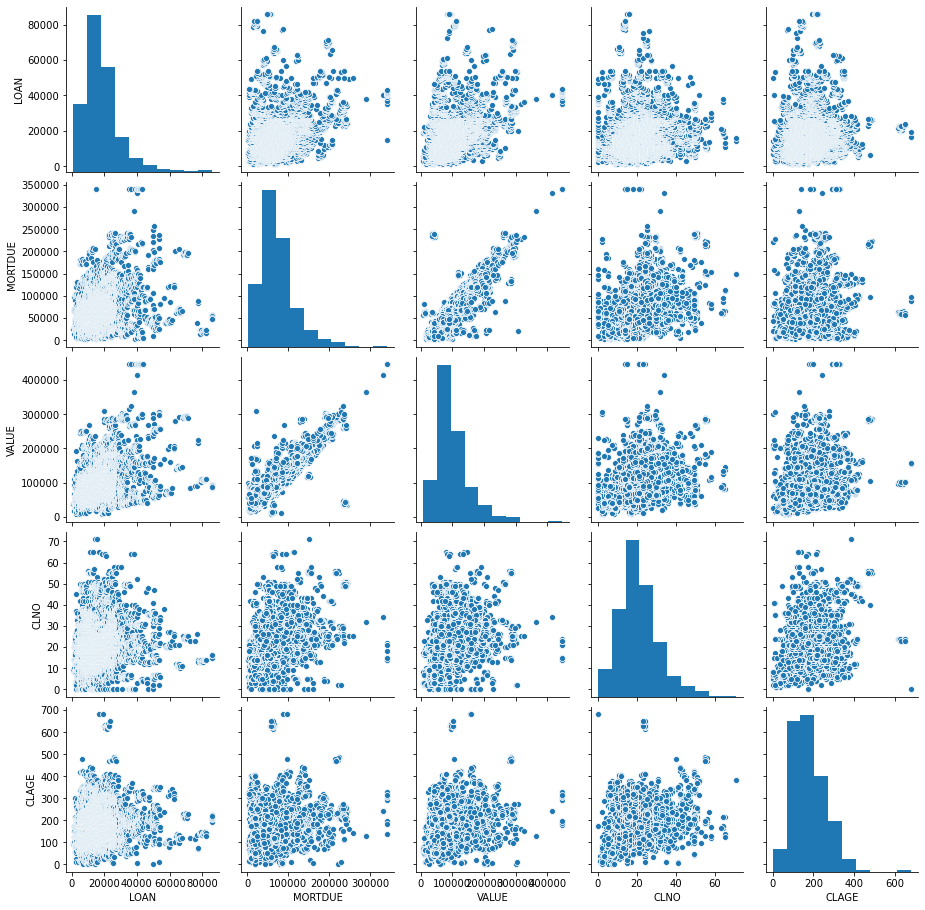

In [3]:
df = pd.read_csv('hmeq_cleaned_after.csv')
sns_plot = sns.pairplot(df[['LOAN', "MORTDUE", "VALUE", "CLNO", "CLAGE"]])
sns_plot.savefig("pairplot.png")

In [15]:
df.to_csv('D:\IMSD\Scoring\hmeq_cleaned.csv', index=False)